In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv('weight_change_dataset.csv')

In [4]:
data.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


## Comment
So, we are going to predict the weight change based on the daily routines of people. Here we have what each column represent:
1. Participant ID: Unique identifier for each participant in the study.
2. Age: The age of the participant (in years), which can influence metabolism and weight change.
3. Gender: Gender of the participant (M/F), as physiological differences may affect weight management.
4. Current Weight (lbs): The participant's weight at the beginning of the study, serving as a baseline for weight change.
5. BMR (Calories): Basal Metabolic Rate, calculated using the Mifflin-St Jeor equation, representing the number of calories burned at rest.
6. Daily Calories Consumed: Total caloric intake per day, including variability to reflect real-world eating habits.
7. Daily Caloric Surplus/Deficit: The difference between calories consumed and BMR, indicating whether the participant is in a caloric surplus or deficit.
8. Weight Change (lbs): The estimated change in weight over a specified duration, based on caloric surplus/deficit.
9. Duration (weeks): The time period over which weight change is measured, ranging from 1 to 12 weeks.
9. Physical Activity Level: Self-reported level of physical activity, categorized as Sedentary, Lightly Active, Moderately Active, or Very Active.
10. Macronutrient Breakdown: Composition of the participant's diet, expressed as percentages of carbohydrates, proteins, and fats.
11. Sleep Quality: Self-reported quality of sleep, categorized as Poor, Fair, Good, or Excellent, which can affect weight management.
12. Stress Level: A numerical score (1-10) indicating the participant's perceived stress level, as stress can influence eating behaviors and weight.

In [8]:
data.describe()

,Participant ID,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,37.910000,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,4.810000,168.750000
std,29.011492,12.219454,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,2.576879,30.588004
min,1.000000,18.000000,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,1.000000,98.200000
25%,25.750000,26.750000,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,2.750000,149.550000
50%,50.500000,38.000000,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,5.000000,169.800000
75%,75.250000,46.250000,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,7.000000,188.300000
max,100.000000,59.000000,238.200000,3390.800000,4000.000000,1922.500000,5.000000,12.000000,9.000000,232.500000


## Comment

In [9]:
data.dtypes

Participant ID                     int64
Age                                int64
Gender                            object
Current Weight (lbs)             float64
BMR (Calories)                   float64
Daily Calories Consumed          float64
Daily Caloric Surplus/Deficit    float64
Weight Change (lbs)              float64
Duration (weeks)                   int64
Physical Activity Level           object
Sleep Quality                     object
Stress Level                       int64
Final Weight (lbs)               float64
dtype: object

## Comment

# Data Preprocessing

In [10]:
data_encoded = data.copy()

# Encode 'Gender'
data_encoded['Gender'] = data_encoded['Gender'].map({'M': 0, 'F': 1})

# Encode 'Physical Activity Level'
activity_mapping = {'Sedentary': 0, 'Lightly Active': 1, 'Moderately Active': 2, 'Very Active': 3}
data_encoded['Physical Activity Level'] = data_encoded['Physical Activity Level'].map(activity_mapping)

# Encode 'Sleep Quality'
sleep_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
data_encoded['Sleep Quality'] = data_encoded['Sleep Quality'].map(sleep_mapping)

data_encoded.isnull().sum()
data_encoded.dropna(inplace=True)

## Comment

In [13]:
numeric_features = ['Age', 'Current Weight (lbs)', 'BMR (Calories)', 'Daily Calories Consumed',
                    'Daily Caloric Surplus/Deficit', 'Duration (weeks)', 'Stress Level']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

# Data exploration

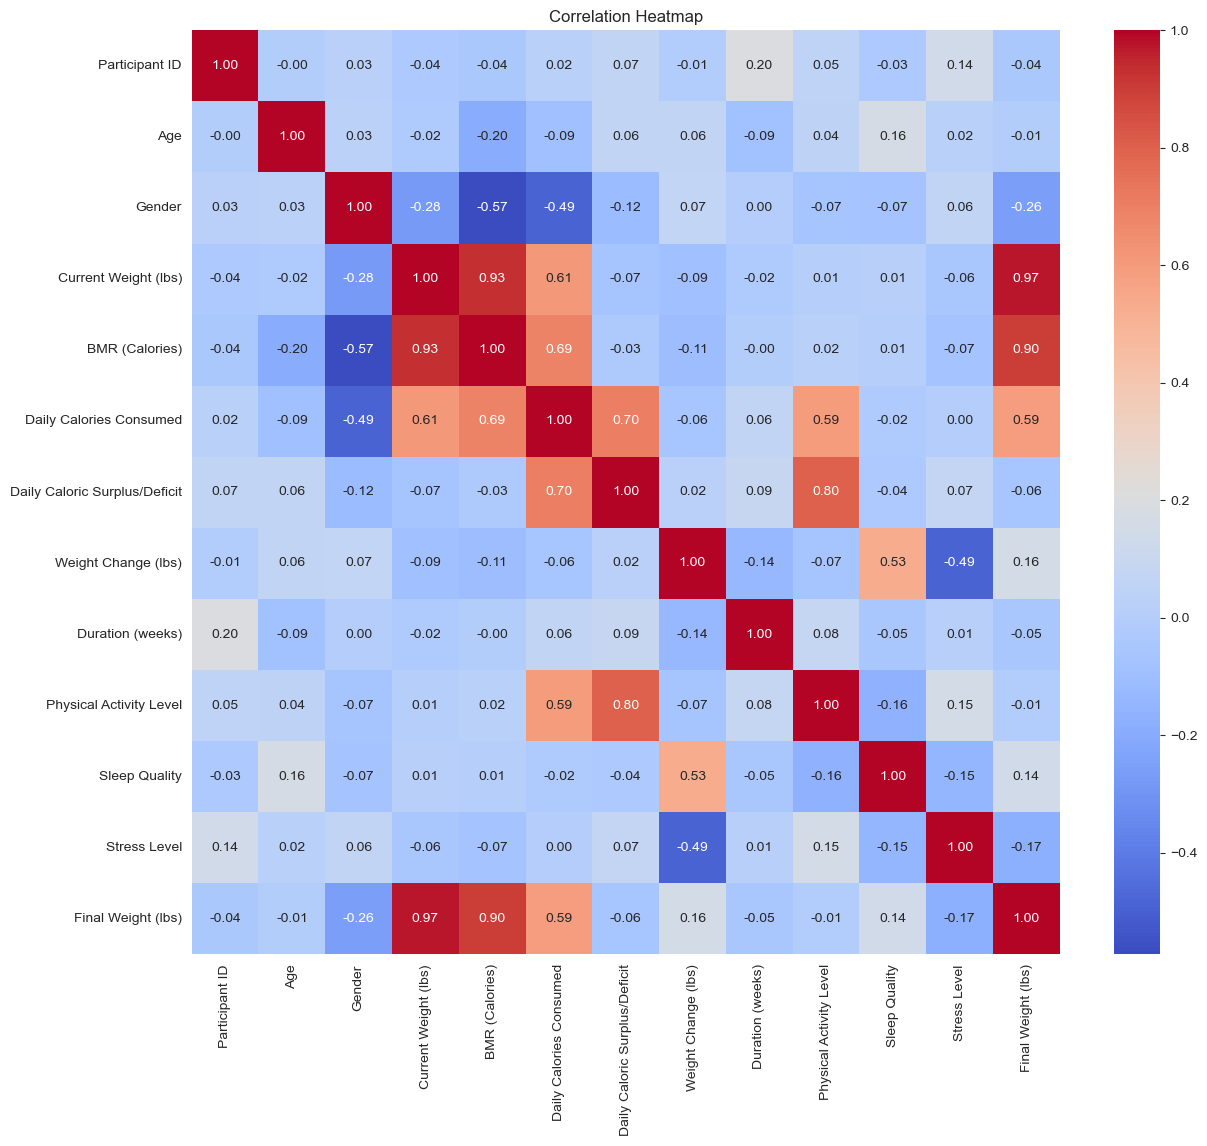

In [14]:
plt.figure(figsize=(14,12))
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Comment


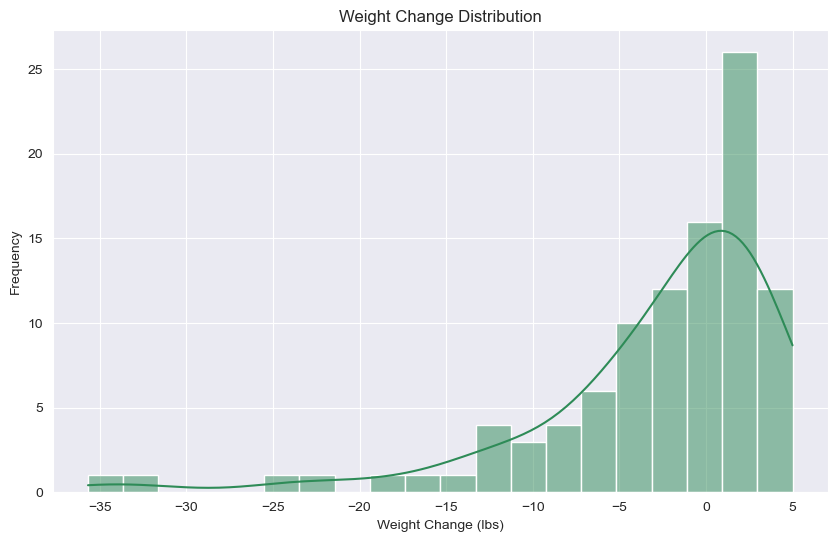

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data_encoded['Weight Change (lbs)'], bins=20, kde=True, color='seagreen')
plt.title('Weight Change Distribution')
plt.xlabel('Weight Change (lbs)')
plt.ylabel('Frequency')
plt.show()

## Comment


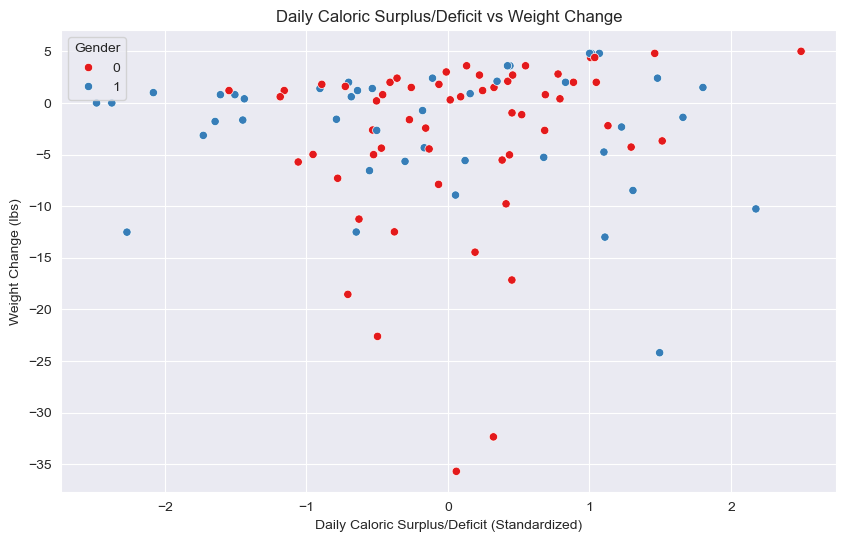

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Daily Caloric Surplus/Deficit', y='Weight Change (lbs)', data=data_encoded, hue='Gender', palette='Set1')
plt.title('Daily Caloric Surplus/Deficit vs Weight Change')
plt.xlabel('Daily Caloric Surplus/Deficit (Standardized)')
plt.ylabel('Weight Change (lbs)')
plt.show()

## Comment

# Data modeling

In [ ]:
X_reg=data_encoded[['']]